In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv("data.csv")
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
data["city"].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [6]:
data["statezip"].value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [7]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
data.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [9]:
 co = data.corr()

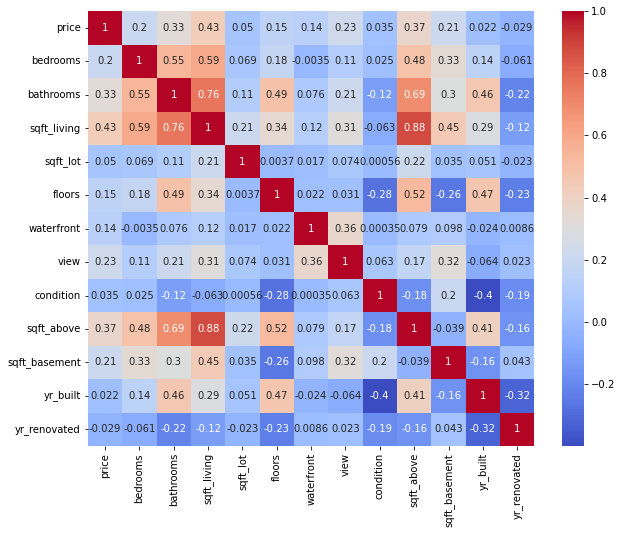

In [10]:
plt.subplots(figsize=(10,8))
sns.heatmap(co,annot = True,cmap='coolwarm')
plt.show()

In [11]:
column_remove = ["date","yr_renovated","street","city","statezip","country"]

In [12]:
data = data.drop(columns = column_remove)

In [13]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974


In [14]:
import scipy.stats as stats
z_score = stats.zscore(data)
threshold = 3
print("size before removing outlier :",data.shape)
outlier_df = data[(z_score>threshold).any(axis=1)]
data = data[(z_score<=threshold).all(axis=1)]
print("size after removing outlier :",data.shape)


size before removing outlier : (4600, 12)
size after removing outlier : (4244, 12)


In [15]:
outlier_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
56,491500.0,4.0,1.75,2190,125452,1.0,0,2,3,2190,0,1968
100,736500.0,4.0,2.50,3180,21904,2.0,0,3,3,3180,0,2000
107,1090000.0,4.0,2.50,4340,141570,2.5,0,0,3,4340,0,1992
118,1030000.0,5.0,2.75,3190,16920,1.0,0,3,3,1690,1500,1976
...,...,...,...,...,...,...,...,...,...,...,...,...
4558,0.0,4.0,4.25,3500,8750,1.0,0,4,5,2140,1360,1951
4562,542500.0,5.0,2.75,2520,16100,1.0,0,3,4,1570,950,1960
4563,0.0,2.0,2.25,2130,4920,1.5,0,4,4,1530,600,1941
4575,0.0,5.0,6.25,8020,21738,2.0,0,0,3,8020,0,2001


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
standard = StandardScaler()
standard.fit(data)
data_scale = pd.DataFrame(standard.transform(data),columns = data.columns)

In [18]:
data_scale

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,-0.696687,-0.407382,-0.837743,-0.863761,-0.209100,-0.001538,0.0,-0.233255,-0.667592,-0.536342,-0.678636,-0.522372
1,-0.587877,-0.407382,-0.125527,-0.109446,0.109953,-0.934006,0.0,-0.233255,0.812691,0.251285,-0.678636,-0.153713
2,-0.295216,-0.407382,0.230581,-0.019951,-0.199769,-0.934006,0.0,-0.233255,0.812691,-0.990229,1.799597,-0.254256
3,0.192553,0.760814,0.586688,-0.096661,-0.004463,-0.934006,0.0,-0.233255,0.812691,-0.803335,1.303950,0.181431
4,-0.032571,-1.575578,-1.549958,-1.451871,-0.330237,-0.934006,0.0,-0.233255,-0.667592,-1.150425,-0.678636,-1.092117
...,...,...,...,...,...,...,...,...,...,...,...,...
4239,-0.714822,-0.407382,-0.481635,-0.646416,-0.331818,-0.934006,0.0,-0.233255,0.812691,-0.309399,-0.678636,-0.555886
4240,0.133770,-0.407382,0.586688,-0.710341,-0.235905,0.930930,0.0,-0.233255,-0.667592,-0.376147,-0.678636,0.416032
4241,-0.306832,-0.407382,0.586688,1.271335,-0.280106,0.930930,0.0,-0.233255,-0.667592,1.693043,-0.678636,1.287408
4242,-1.107914,0.760814,-0.125527,0.095114,-0.310469,-0.934006,0.0,-0.233255,-0.667592,-0.896782,1.849161,0.114402


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [26]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [21]:
x = data_scale.drop(["price"],axis=1)
y = data[("price")]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

0       313000.000000
2       342000.000000
3       420000.000000
4       550000.000000
5       490000.000000
            ...      
4595    308166.666667
4596    534333.333333
4597    416904.166667
4598    203400.000000
4599    220600.000000
Name: price, Length: 4244, dtype: float64

In [22]:
print(f"'x'train {x_train.shape}")
print(f"'x'test {x_test.shape}")

'x'train (3183, 11)
'x'test (1061, 11)


In [25]:
models = [
    ("LinearRegression",LinearRegression()),
    ("RandomForestRegressor", RandomForestRegressor()),
    ("DecisionTreeRegressor",DecisionTreeRegressor()),
    ("KNeighborsRegressor",KNeighborsRegressor())
]


In [27]:
for name,model in models:
    print(name)
    print()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("mean_squared_error:",mean_squared_error(y_test,y_pred))
    print("\n")
    print("r2_score:",r2_score(y_test,y_pred))
    print("\n")
    print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))
    print("\n")
    

LinearRegression

mean_squared_error: 41197029629.49037


r2_score: 0.4476389180134792


mean_absolute_error: 139500.2122291223


RandomForestRegressor

mean_squared_error: 43828441539.71633


r2_score: 0.41235750226684087


mean_absolute_error: 141086.66891729322


DecisionTreeRegressor

mean_squared_error: 74616887875.58733


r2_score: -0.00044749080459793866


mean_absolute_error: 186952.0839931395


KNeighborsRegressor

mean_squared_error: 48014530147.90733


r2_score: 0.3562313093420809


mean_absolute_error: 150698.51612505483


